Optional project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 76)

In [3]:
# Have to use openpyxl to get pandas to accept xlsx files.

main_file_location = './FIFA.xlsx'
data_dictionary_location = './Data Dictionary.xlsx'

fifa_df = pd.read_excel(main_file_location, engine = 'openpyxl').rename(columns={'Unnamed: 0' : 'id'})
dict_df = pd.read_excel(data_dictionary_location, engine = 'openpyxl')

In [4]:
fifa_df.head().style.hide_index()

id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5M,565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.000000,53.000000,62.000000,91.000000,82.000000,89.000000,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.000000,91.000000,66.000000,ST LW,89.000000,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.000000,91.000000,66.000000,92.000000
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105M,565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.000000,45.000000,59.000000,92.000000,84.000000,92.000000,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.000000,91.000000,62.000000,RW,92.000000,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.000000,91.000000,62.000000,88.000000
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123M,280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.000000,46.000000,59.000000,88.000000,79.000000,88.000000,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.000000,89.000000,64.000000,LW,88.000000,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.000000,89.000000,64.000000,84.000000
3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97M,510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.000000,58.000000,65.000000,88.000000,80.000000,87.000000,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.000000,87.000000,68.000000,ST,87.000000,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.000000,87.000000,68.000000,88.000000
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61M,230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,GK,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
dict_df.style.hide_index()

Feature,Explanation
player index number,nan
Name,name of a player
Age,age of a player
Photo,picture of player
Nationality,player nationality
Flag,nan
Overall,Overall Rating of the player
Potential,Potential Rating of the player
Club,The international club for which the player plays
Club Logo,nan


In [6]:
nationality_sum = fifa_df.groupby(['Nationality']).count()
top_5_countries = pd.DataFrame(nationality_sum.iloc[:,1].sort_values(ascending = False)[0:5]).rename(columns={'Name' : 'num_players'})
top_5_countries

,num_players
Nationality,
England,1630
Germany,1140
Spain,1019
France,978
Argentina,965


In [7]:
untapped_potential = fifa_df[fifa_df['Overall'] < fifa_df['Potential']]
age_sorted_untapped_potential = untapped_potential.sort_values('Age', ascending = False)
last_year_of_improvement = age_sorted_untapped_potential.iloc[0, 2]
print("The age after which a player stops improving is age {x}.".format(x = last_year_of_improvement))

The age after which a player stops improving is age 30.


In [8]:
hint_position_answer = fifa_df['Preferred Positions'].apply(lambda x: x[:3])
my_position_answer = fifa_df['Preferred Positions'].apply(lambda x: x.split()[0])

print("This is the given hint solution.  It works, but it leaves a trailing space for any two-character names.")
print(list(hint_position_answer.unique()))
print("\nMy solution leaves no extra spaces.")
print(list(my_position_answer.unique()))

# The hint solution could be changed to:
#    fifa_df['Preferred Positions'].apply(lambda x: x[:3].strip())

This is the given hint solution.  It works, but it leaves a trailing space for any two-character names.
['ST ', 'RW ', 'LW ', 'GK ', 'CDM', 'CB ', 'RM ', 'CM ', 'LM ', 'LB ', 'CAM', 'RB ', 'CF ', 'RWB', 'LWB']

My solution leaves no extra spaces.
['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB', 'CF', 'RWB', 'LWB']


In [9]:
fifa_df['Position'] = my_position_answer
fifa_df.head(15).iloc[:, [1, 10, 11, 74]].style.hide_index()

Name,Value,Wage,Position
Cristiano Ronaldo,95.5M,565K,ST
L. Messi,105M,565K,RW
Neymar,123M,280K,LW
L. SuÃ¡rez,97M,510K,ST
M. Neuer,61M,230K,GK
R. Lewandowski,92M,355K,ST
De Gea,64.5M,215K,GK
E. Hazard,90.5M,295K,LW
T. Kroos,79M,340K,CDM
G. HiguaÃ­n,77M,275K,ST


In [10]:
print("I wanted to look at the average instead of the scatterplot at first.\n")
offense_df = fifa_df[fifa_df['Position'].isin(['ST', 'LW', 'RW'])]
new_wage = pd.to_numeric(offense_df.rename(columns = {'Wage':'New_Wage'}).loc[:, 'New_Wage'].apply(lambda x: str(x).replace('K', '000')))# converting to number for the groupby.
offense_df = pd.concat([offense_df, new_wage], axis = 1)   # I'm mostly just using concat to avoid the 'slicing' warning that I couldn't seem to get around.
wage_mean_by_position = offense_df[['New_Wage', 'Position']].groupby(['Position']).mean()
wage_mean_by_position

I wanted to look at the average instead of the scatterplot at first.



,New_Wage
Position,
LW,15803.278689
RW,15568.764569
ST,13341.238472


In [11]:
print("Out of curiosity, I decided to look at the median as well.\n")
wage_median_by_position = offense_df[['New_Wage', 'Position']].groupby(['Position']).median()
wage_median_by_position

Out of curiosity, I decided to look at the median as well.



,New_Wage
Position,
LW,5000
RW,4000
ST,5000


There isn't too much visible difference between the positions.  The outliers of Messi (RW) and Ronaldo (ST) can be clearly seen here.



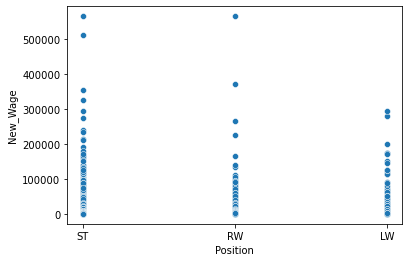

In [12]:
print("There isn't too much visible difference between the positions.  The outliers of Messi (RW) and Ronaldo (ST) can be clearly seen here.\n")
sns.scatterplot(data = offense_df, x = 'Position', y = 'New_Wage');

The strip plot helps show things a little more clearly, but it's still hard to see any real relationship due to the volume of the points at the bottom.



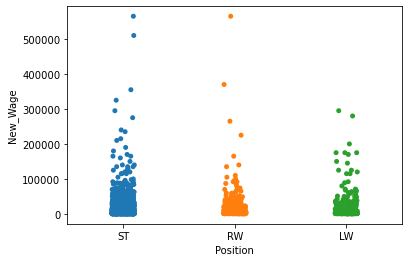

In [13]:
print("The strip plot helps show things a little more clearly, but it's still hard to see any real relationship due to the volume of the points at the bottom.\n")
sns.stripplot(data = offense_df, x = 'Position', y = 'New_Wage');

As a little something extra, I wanted to see the relationship between age, position, and age.
  You can see Ronaldo and Messi at the top


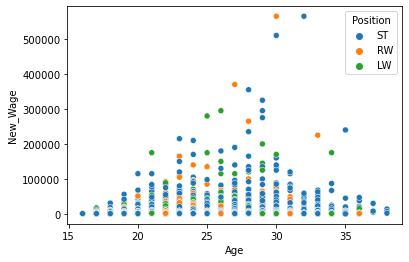

In [14]:
print("As a little something extra, I wanted to see the relationship between age, position, and age.\n  You can see Ronaldo and Messi at the top")
sns.scatterplot(data = offense_df, hue = 'Position', y = 'New_Wage', x = 'Age');

In [15]:
print("Left Wingers have the highest average salary though that is hard to see in the charts.")

Left Wingers have the highest average salary though that is hard to see in the charts.


### Top 5 players for every preferred position in terms of overall as well as potential points. Who were the best in 2018?

In [16]:
fifa_df.head().style.hide_index()

id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5M,565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.000000,53.000000,62.000000,91.000000,82.000000,89.000000,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.000000,91.000000,66.000000,ST LW,89.000000,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.000000,91.000000,66.000000,92.000000,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105M,565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.000000,45.000000,59.000000,92.000000,84.000000,92.000000,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.000000,91.000000,62.000000,RW,92.000000,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.000000,91.000000,62.000000,88.000000,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123M,280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.000000,46.000000,59.000000,88.000000,79.000000,88.000000,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.000000,89.000000,64.000000,LW,88.000000,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.000000,89.000000,64.000000,84.000000,LW
3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97M,510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.000000,58.000000,65.000000,88.000000,80.000000,87.000000,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.000000,87.000000,68.000000,ST,87.000000,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.000000,87.000000,68.000000,88.000000,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61M,230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,GK,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,GK


In [17]:
position_grouped_df = fifa_df[['Potential', 'Overall', 'Position']].groupby('Position')

In [18]:
top_5_overall = position_grouped_df['Overall'].nlargest(5).reset_index().rename(columns={'level_1' : 'id'})

In [19]:
top_5_potential = position_grouped_df['Potential'].nlargest(5).reset_index().rename(columns={'level_1' : 'id'})

In [20]:
top_5_potential.head(7).style.hide_index()

Position,id,Potential
CAM,128,92
CAM,394,90
CAM,54,89
CAM,129,88
CAM,133,88
CB,70,92
CB,10,90


In [21]:
top_5_overall.head(7).style.hide_index()

Position,id,Overall
CAM,54,86
CAM,59,86
CAM,65,86
CAM,112,84
CAM,114,84
CB,10,90
CB,17,89


In [22]:
top_5_overall_named = top_5_overall.merge(fifa_df, how = 'inner', on = ['id', 'Position', 'Overall'])
top_5_potential_named = top_5_potential.merge(fifa_df, how = 'inner', on = ['id', 'Position', 'Potential'])

In [23]:
top_5_overall_named = top_5_overall_named.loc[:, ['Position', 'Name', 'Overall']]
top_5_overall_named.head(6).style.hide_index()

Position,Name,Overall
CAM,Coutinho,86
CAM,R. Nainggolan,86
CAM,Cesc FÃ bregas,86
CAM,I. PeriÅ¡iÄ‡,84
CAM,Willian,84
CB,Sergio Ramos,90


In [24]:
print("These were the best players in the world in 2018 by overall skill:\n", ', '.join(top_5_overall_named['Name'].to_list()))

These were the best players in the world in 2018 by overall skill:
 Coutinho, R. Nainggolan, Cesc FÃ bregas, I. PeriÅ¡iÄ‡, Willian, Sergio Ramos, G. Chiellini, L. Bonucci, J. Boateng, D. GodÃ­n, T. Kroos, L. ModriÄ‡, Thiago, M. Verratti, P. Pogba, S. Kagawa, Jonas, Borja Valero, F. VÃ¡zquez, D. Perotti, N. KantÃ©, A. Vidal, M. HamÅ¡Ã­k, I. RakitiÄ‡, D. Alaba, M. Neuer, De Gea, T. Courtois, G. Buffon, J. Oblak, Marcelo, Jordi Alba, Azpilicueta, Filipe LuÃ­s, M. Rojo, C. Eriksen, David Silva, Iniesta, Isco, Alex Sandro, Neymar, E. Hazard, A. Griezmann, M. Reus, F. RibÃ©ry, D. Rose, B. Davies, B. Mendy, J. Holebas, A. Cresswell, Carvajal, Dani Alves, A. Valencia, Juanfran, A. RÃ¼diger, K. De Bruyne, A. SÃ¡nchez, J. RodrÃ­guez, Y. Carrasco, Bernardo Silva, L. Messi, G. Bale, M. Ã–zil, A. Robben, M. Salah, K. Walker, A. Oxlade-Chamberlain, M. Antonio, K. Trippier, D. Janmaat, Cristiano Ronaldo, L. SuÃ¡rez, R. Lewandowski, G. HiguaÃ­n, S. AgÃ¼ero


In [25]:
top_5_potential_named = top_5_potential_named.loc[:, ['Position', 'Name', 'Potential']]
top_5_potential_named.head(6).style.hide_index()

Position,Name,Potential
CAM,O. DembÃ©lÃ©,92
CAM,Y. Tielemans,90
CAM,Coutinho,89
CAM,N. KeÃ¯ta,88
CAM,JoÃ£o MÃ¡rio,88
CB,R. Varane,92


In [26]:
print("These were the best players in the world in 2018 by overall skill:\n", ', '.join(top_5_potential_named['Name'].to_list()))

These were the best players in the world in 2018 by overall skill:
 O. DembÃ©lÃ©, Y. Tielemans, Coutinho, N. KeÃ¯ta, JoÃ£o MÃ¡rio, R. Varane, Sergio Ramos, G. Chiellini, E. Bailly, A. Laporte, P. Pogba, M. Verratti, T. Kroos, Thiago, L. ModriÄ‡, K. Havertz, F. Chiesa, V. Thill, S. Kagawa, Jonas, N. KantÃ©, E. Barco, A. Gomes, D. Alaba, T. Bakayoko, G. Donnarumma, J. Oblak, M. Neuer, De Gea, T. Courtois, L. HernÃ¡ndez, M. Sarr, Marcelo, Azpilicueta, Grimaldo, C. Eriksen, T. Lemar, L. SanÃ©, Isco, D. Alli, Neymar, Marco Asensio, E. Hazard, A. Griezmann, S. ManÃ©, B. Mendy, M. Saracchi, MarÃ­n, D. Rose, B. Davies, HÃ©ctor BellerÃ­n, T. Fosu-Mensah, Carvajal, NÃ©lson Semedo, A. RÃ¼diger, K. De Bruyne, Bernardo Silva, Y. Carrasco, SaÃºl, A. SÃ¡nchez, L. Messi, G. Bale, Deulofeu, M. Ã–zil, A. Robben, A. Oxlade-Chamberlain, K. Walker, T. Adams, M. Antonio, E. Fernandes, Cristiano Ronaldo, K. MbappÃ©, P. Dybala, L. SuÃ¡rez, Gabriel Jesus


In [27]:
club_nation_counts = fifa_df[['id', 'Club', 'Nationality']].groupby(['Nationality', 'Club']).count()

In [28]:
club_nation_counts

id
Nationality Club                    
Afghanistan AFC Eskilstuna         1
            Crystal Palace         1
            Walsall                1
Albania     1. FC Kaiserslautern   1
            AC Ajaccio             1
...                               ..
Zimbabwe    Hobro IK               1
            KV Oostende            1
            Kaizer Chiefs          3
            Orlando Pirates        1
            Sparta Praha           1

[5003 rows x 1 columns]

In [29]:
club_nation_counts = club_nation_counts.reset_index().rename(columns={'id' : 'player_count'}).sort_values('player_count', ascending = False)

# England
club_england_counts = club_nation_counts[club_nation_counts['Nationality'] == 'England']
max_num_english = max(club_england_counts['player_count'])

# Spain
club_spain_counts = club_nation_counts[club_nation_counts['Nationality'] == 'Spain']
max_num_spanish = max(club_spain_counts['player_count'])

# Germany
club_german_counts = club_nation_counts[club_nation_counts['Nationality'] == 'Germany']
max_num_german = max(club_german_counts['player_count'])

In [30]:
print("The club(s) with the most English.\n")
club_england_counts[club_england_counts['player_count'] == max_num_english]

The club(s) with the most English.



,Nationality,Club,player_count
1629,England,Shrewsbury,24
1524,England,Bolton Wanderers,24


In [31]:
print("The club(s) with the most Spanish.\n")
club_spain_counts[club_spain_counts['player_count'] == max_num_spanish]

The club(s) with the most Spanish.



,Nationality,Club,player_count
4234,Spain,CA Osasuna,27


In [32]:
print("The club(s) with the most Germans.\n")
club_german_counts[club_german_counts['player_count'] == max_num_german]

The club(s) with the most Germans.



,Nationality,Club,player_count
2054,Germany,Holstein Kiel,26


In [33]:
list(fifa_df['Position'].unique())

['ST',
 'RW',
 'LW',
 'GK',
 'CDM',
 'CB',
 'RM',
 'CM',
 'LM',
 'LB',
 'CAM',
 'RB',
 'CF',
 'RWB',
 'LWB']

In [34]:
position_dict = {
 'ST'  : 'forward',
 'RW'  : 'forward',
 'LW'  : 'forward',
 'GK'  : 'goalie',
 'CDM' : 'midfielder',
 'CB'  : 'defender',
 'RM'  : 'midfielder',
 'CM'  : 'midfielder',
 'LM'  : 'midfielder',
 'LB'  : 'defender',
 'CAM' : 'midfielder',
 'RB'  : 'defender',
 'CF'  : 'forward',
 'RWB' : 'defender',
 'LWB' : 'defender'}

In [35]:
fifa_df['simple_position'] = fifa_df['Position'].replace(position_dict)

In [36]:
euro_team_df = fifa_df.loc[fifa_df['Nationality'].isin(['Germany', 'England', 'France', 'Spain', 'Italy']), ['Name','Nationality','simple_position', 'Overall', 'Stamina']]

In [37]:
euro_team_df.head(11).style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
M. Neuer,Germany,goalie,92,44
De Gea,Spain,goalie,90,40
T. Kroos,Germany,midfielder,90,77
Sergio Ramos,Spain,defender,90,84
G. Chiellini,Italy,defender,89,68
G. Buffon,Italy,goalie,89,39
A. Griezmann,France,forward,88,76
Thiago,Spain,midfielder,88,75
L. Bonucci,Italy,defender,88,73
J. Boateng,Germany,defender,88,74


In [38]:
german_player_pool = euro_team_df[euro_team_df['Nationality'] == 'Germany']
english_player_pool = euro_team_df[euro_team_df['Nationality'] == 'England']
spanish_player_pool = euro_team_df[euro_team_df['Nationality'] == 'Spain']
french_player_pool = euro_team_df[euro_team_df['Nationality'] == 'France']

In [39]:
standard_position_needs = {
    'goalie'     : 1,
    'defender'   : 4,
    'midfielder' : 3,
    'forward'    : 3        }

In [40]:
def roster_filler(country = 'Germany', position_needs = standard_position_needs):
    roster = []
    for position in euro_team_df['simple_position'].unique():
        position_count = standard_position_needs[position]
        x = euro_team_df[(euro_team_df['simple_position'] == position) & (euro_team_df['Nationality'] == country)].sort_values(by = ['Overall', 'Stamina'], ascending = False).iloc[0:position_count]
        roster.append(x)
    roster = pd.concat(roster)
    return(roster)

In [41]:
german_roster = roster_filler('Germany')
spanish_roster = roster_filler('Spain')
english_roster = roster_filler('England')
italian_roster = roster_filler('Italy')
french_roster = roster_filler('France')
euro_roster = pd.concat([
    german_roster,
    spanish_roster,
    english_roster,
    italian_roster,
    french_roster 
    ])

In [42]:
euro_roster.head(12).style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
M. Neuer,Germany,goalie,92,44
T. Kroos,Germany,midfielder,90,77
I. GÃ¼ndoÄŸan,Germany,midfielder,85,71
S. Khedira,Germany,midfielder,84,78
J. Boateng,Germany,defender,88,74
M. Hummels,Germany,defender,88,66
S. Mustafi,Germany,defender,84,74
B. HÃ¶wedes,Germany,defender,83,68
M. Ã–zil,Germany,forward,88,69
T. MÃ¼ller,Germany,forward,86,90


In [43]:
german_roster.style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
M. Neuer,Germany,goalie,92,44
T. Kroos,Germany,midfielder,90,77
I. GÃ¼ndoÄŸan,Germany,midfielder,85,71
S. Khedira,Germany,midfielder,84,78
J. Boateng,Germany,defender,88,74
M. Hummels,Germany,defender,88,66
S. Mustafi,Germany,defender,84,74
B. HÃ¶wedes,Germany,defender,83,68
M. Ã–zil,Germany,forward,88,69
T. MÃ¼ller,Germany,forward,86,90


In [44]:
spanish_roster.style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
De Gea,Spain,goalie,90,40
Thiago,Spain,midfielder,88,75
David Silva,Spain,midfielder,87,78
Iniesta,Spain,midfielder,87,58
Sergio Ramos,Spain,defender,90,84
PiquÃ©,Spain,defender,87,66
Jordi Alba,Spain,defender,85,90
Azpilicueta,Spain,defender,85,88
Diego Costa,Spain,forward,86,83
Pedro,Spain,forward,84,78


In [45]:
english_roster.style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
J. Hart,England,goalie,82,28
D. Alli,England,midfielder,84,89
A. Lallana,England,midfielder,83,90
J. Henderson,England,midfielder,82,93
G. Cahill,England,defender,84,69
K. Walker,England,defender,83,90
N. Clyne,England,defender,82,87
D. Rose,England,defender,82,81
H. Kane,England,forward,86,85
D. Sturridge,England,forward,82,68


In [46]:
italian_roster.style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
G. Buffon,Italy,goalie,89,39
M. Verratti,Italy,midfielder,87,77
C. Marchisio,Italy,midfielder,85,81
D. De Rossi,Italy,midfielder,83,78
G. Chiellini,Italy,defender,89,68
L. Bonucci,Italy,defender,88,73
A. Barzagli,Italy,defender,85,46
F. Acerbi,Italy,defender,82,69
L. Insigne,Italy,forward,85,75
G. Bonaventura,Italy,forward,83,87


In [47]:
french_roster.style.hide_index()

Name,Nationality,simple_position,Overall,Stamina
H. Lloris,France,goalie,88,41
N. KantÃ©,France,midfielder,87,94
P. Pogba,France,midfielder,87,91
B. Matuidi,France,midfielder,85,94
R. Varane,France,defender,85,68
L. Koscielny,France,defender,84,75
A. Laporte,France,defender,84,71
S. Umtiti,France,defender,83,79
A. Griezmann,France,forward,88,76
K. Benzema,France,forward,86,73


In [48]:
for opponent in ['Germany', 'Spain', 'Italy', 'England']:
    position_difference = sum(euro_roster[euro_roster['Nationality'] == 'France'].reset_index(drop=False)['Overall'] - euro_roster[euro_roster['Nationality'] == opponent].reset_index(drop=False)['Overall'])
    print('France vs {0}:  {1}'.format(opponent, position_difference))

France vs Germany:  -11
France vs Spain:  -10
France vs Italy:  4
France vs England:  32


In [49]:
msg = '''This analysis has been done rather crudely.\nWe are directly matching up each position and subtracting it from the counterpart on the other team.  (defender1_fr - defender1_en).\nThis may not correspond to much on-field action where it might matter more what the (forward1_fr - defender1_en) value is.\nHowever, since in the end we end up summing across all positions, this is more an exercise in the total talent level of one country's national team vs the total talent level of another's.\nWith that being said, it looks like we, France, have good odds against England.\nWe should beat Italy, but it will be close.\nWe currently are outmatched by Germany and Spain.'''
print(msg)

This analysis has been done rather crudely.
We are directly matching up each position and subtracting it from the counterpart on the other team.  (defender1_fr - defender1_en).
This may not correspond to much on-field action where it might matter more what the (forward1_fr - defender1_en) value is.
However, since in the end we end up summing across all positions, this is more an exercise in the total talent level of one country's national team vs the total talent level of another's.
With that being said, it looks like we, France, have good odds against England.
We should beat Italy, but it will be close.
We currently are outmatched by Germany and Spain.
